##  5.1 线性问题与非线性问题

### 7.1.1 用线性单分逻辑回归分析肿瘤是良性还是恶性的

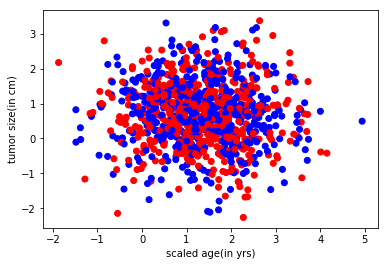

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 生成样本集
# 每个数据点有两个特征-scaled age和tumor size
# 整个数据集有两个类别-良性和恶性
def generate(sample_size, mean, cov, diff, regression):
    num_class = 2 
    samples_per_class = int(sample_size/2)
    
  
    x0 = np.random.multivariate_normal(mean, cov, samples_per_class) # 根据参数生成一个二元正态分布矩阵
    y0 = np.zeros(samples_per_class)
    
  
    for ci, d in enumerate(diff): # 返回[(0,3)-对应恶性肿瘤,(1,0)-对应良性肿瘤]
        x1 = np.random.multivariate_normal(mean+d, cov, samples_per_class) 
        y1 = (ci+1)*np.ones(samples_per_class)
        
        x = np.concatenate((x0, x1))
        y = np.concatenate((y0, y1))
    
    if regression==False: # one_hot编码
        class_ind = [y==class_number for class_number in range(num_classes)]
        y = np.asarray(np.hstack(class_ind), dtupe=np.float32)
        
    np.random.shuffle(x)
    np.random.shuffle(y)
    
    return x,y

# 调用generate函数生产1000个数据，并将其可视化

np.random.seed(10)
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)
x, y = generate(1000, mean, cov, [3,0], True)
colors = ['r' if l==0 else 'b' for l in y[:]]

plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.xlabel('scaled age(in yrs)')
plt.ylabel('tumor size(in cm)')
plt.show()